<a href="https://colab.research.google.com/github/mohammad-aman/project/blob/main/Mining_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM DATA EXPLORATION 

In [ ]:
!pip install jupyterthemes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


     |████████████████████████████████| 7.0 MB 12.2 MB/s 
     |████████████████████████████████| 9.9 MB 45.5 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 428 kB 49.7 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.3 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving mining_data.csv to mining_data.csv


In [ ]:
import io
  
mining_df = pd.read_csv(io.BytesIO(uploaded['mining_data.csv']))


In [ ]:
mining_df.isnull().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [ ]:
# check the number of null elements in the dataframe


MINI CHALLENGE #2: 
- What is the average percentage Silica concentrate?
- What is the maximum percentage Iron Concentrate?

# TASK #3: PERFORM DATA VISUALIZATION

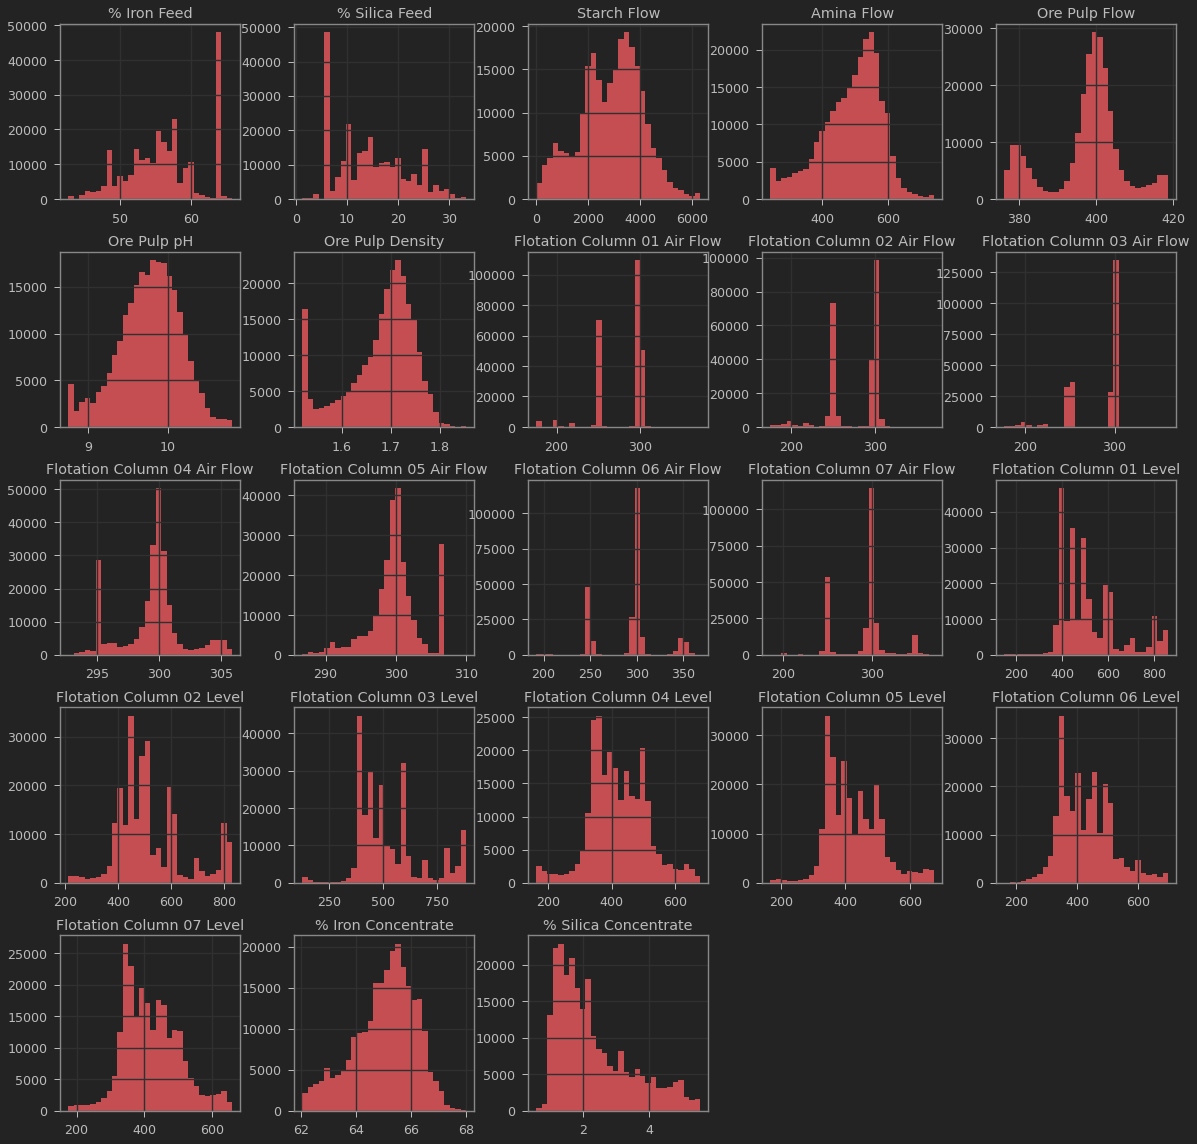

In [ ]:
mining_df.hist(bins=30,figsize=(20,20),color='r')
plt.show()

In [ ]:
# Obtain the correlation matrix
mining_df.corr()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971837,0.028644,-0.088595,0.164676,0.007496,-0.125583,-0.062448,-0.170716,-0.062318,-0.141811,0.124844,-0.043084,-0.016722,0.029619,0.020928,0.015189,0.016346,0.023571,0.003910,0.026100,0.055526,-0.077108
% Silica Feed,-0.971837,1.000000,-0.016489,0.079065,-0.154508,0.007953,0.104567,0.091833,0.183953,0.084325,0.166009,-0.134294,0.068399,0.046193,-0.038417,-0.037113,-0.022653,-0.034534,-0.044270,-0.020568,-0.047079,-0.044292,0.072778
Starch Flow,0.028644,-0.016489,1.000000,0.261934,0.044926,0.269135,0.231530,0.195538,0.192244,0.187602,0.098634,-0.093094,0.223137,0.202817,-0.302567,-0.286336,-0.309177,-0.013037,-0.057417,-0.077105,-0.039584,0.071303,-0.068008
Amina Flow,-0.088595,0.079065,0.261934,1.000000,0.219162,0.124254,0.659461,0.111994,0.124490,0.102632,0.016685,-0.045642,0.122063,0.081561,-0.270753,-0.236452,-0.288484,-0.183739,-0.215334,-0.209496,-0.171384,-0.111045,0.157644
Ore Pulp Flow,0.164676,-0.154508,0.044926,0.219162,1.000000,0.121256,0.012571,-0.141215,-0.122322,-0.144232,-0.164685,0.176281,-0.164935,-0.146904,-0.008877,-0.008335,-0.055890,-0.010212,0.002158,-0.018051,0.017185,0.085098,0.008519
Ore Pulp pH,0.007496,0.007953,0.269135,0.124254,0.121256,1.000000,0.115073,0.163433,0.146264,0.193887,0.155388,-0.144273,0.115448,0.178322,-0.166525,-0.154391,-0.140251,0.046933,0.013095,-0.079157,0.019193,0.192705,-0.147550
Ore Pulp Density,-0.125583,0.104567,0.231530,0.659461,0.012571,0.115073,1.000000,-0.004695,0.026413,-0.031237,-0.099155,0.045261,-0.030314,-0.052655,-0.112201,-0.093542,-0.149823,-0.089066,-0.142675,-0.105346,-0.087454,0.015116,0.047413
Flotation Column 01 Air Flow,-0.062448,0.091833,0.195538,0.111994,-0.141215,0.163433,-0.004695,1.000000,0.854298,0.955256,0.488605,-0.209335,0.670130,0.658199,-0.443870,-0.428294,-0.372533,-0.062665,-0.092254,-0.125196,-0.112074,0.099239,-0.219698
Flotation Column 02 Air Flow,-0.170716,0.183953,0.192244,0.124490,-0.122322,0.146264,0.026413,0.854298,1.000000,0.866927,0.449124,-0.188583,0.598969,0.592888,-0.437313,-0.428303,-0.368913,-0.075833,-0.112465,-0.124478,-0.114693,0.059709,-0.169029
Flotation Column 03 Air Flow,-0.062318,0.084325,0.187602,0.102632,-0.144232,0.193887,-0.031237,0.955256,0.866927,1.000000,0.505138,-0.231556,0.667008,0.661261,-0.443454,-0.423836,-0.365800,-0.047216,-0.064355,-0.105673,-0.086448,0.100888,-0.219593


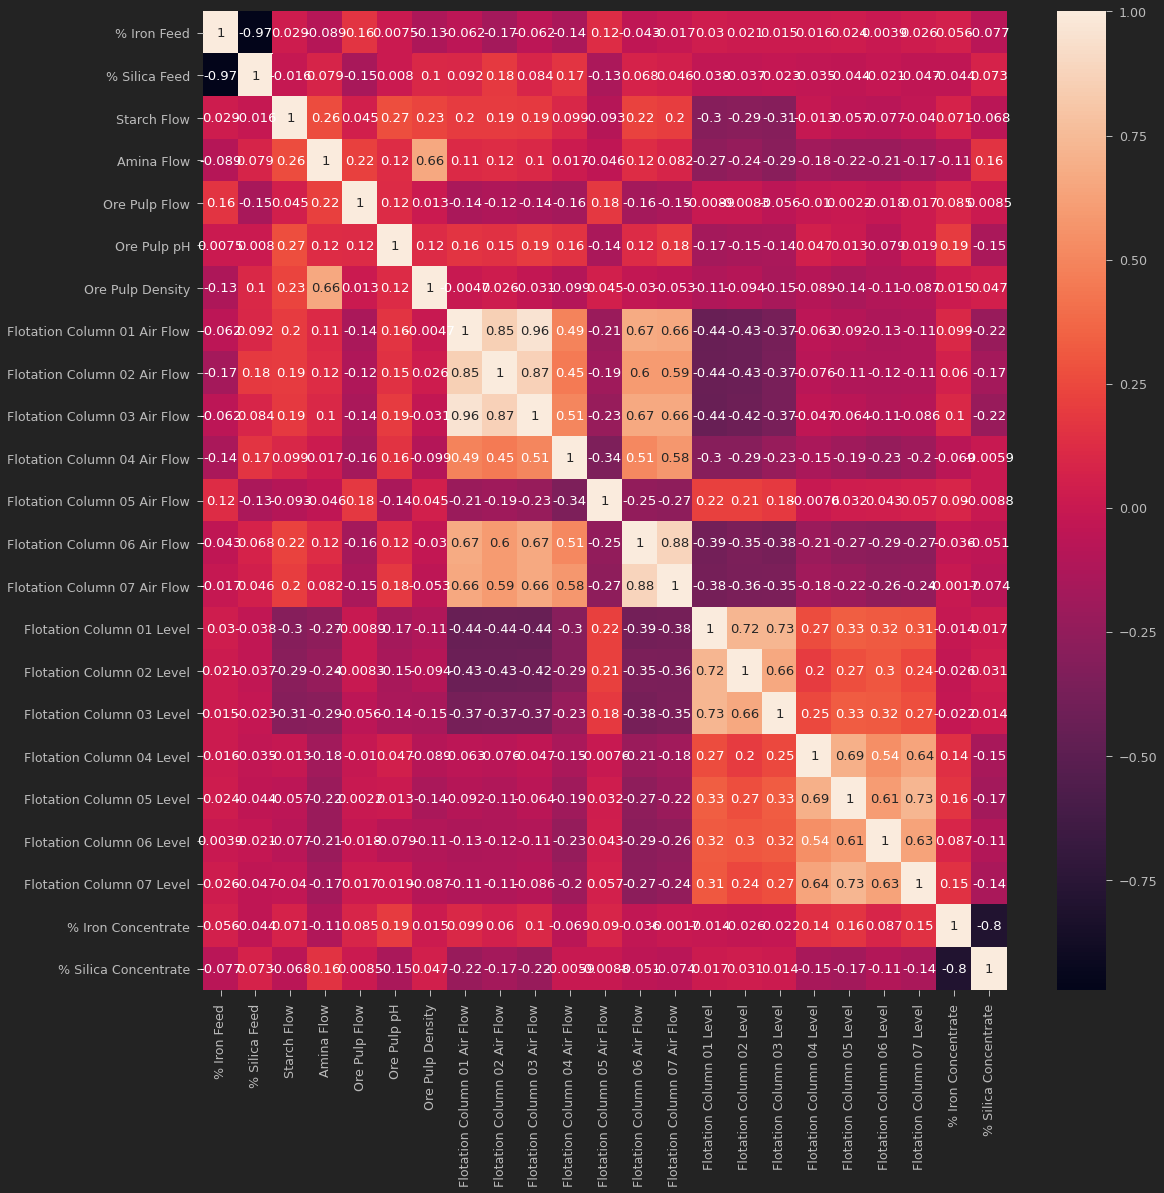

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(mining_df.corr(),annot=True)
# From this pair plot, we can infer that there is a relationship between iron feed and silica feed 
# Also, a relationship between silica concentrate and iron concentrate.

MINI CHALLENGE #3: 
- Plot the scatterplot between % Silica Concentrate and Iron Concentrate and try to relate to the correlation matrix. 
- Plot the scatterplot between % Iron Feed and % Silica Feed and try to relate to the correlation matrix. 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


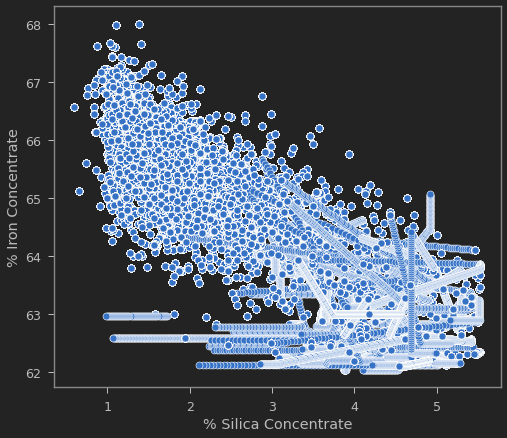

In [ ]:
sns.scatterplot(mining_df['% Silica Concentrate'], mining_df['% Iron Concentrate'])

# TASK #4: PREPARE THE DATA BEFORE MODEL TRAINING

In [ ]:
df_iron = mining_df.drop(columns = '% Silica Concentrate')
df_iron_target = mining_df['% Silica Concentrate']

In [ ]:
df_iron.shape

(245700, 22)

In [ ]:
df_iron_target.shape

(245700,)

In [ ]:
df_iron = np.array(df_iron)
df_iron_target = np.array(df_iron_target)

In [ ]:
# reshaping the array
df_iron_target = df_iron_target.reshape(-1,1)
df_iron_target.shape

(245700, 1)

In [ ]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler_x=StandardScaler()
X=Scaler_x.fit_transform(df_iron)

Scaler_y=StandardScaler()
y=Scaler_y.fit_transform(df_iron_target)

In [ ]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

MINI CHALLENGE #4: 
- Verify that the split was successful 

# TASK #5: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
accuracy_LR=lr.score(X_test,y_test)
accuracy_LR

0.6783254039169864

# TASK #6: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [ ]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm



In [ ]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)
accuracy_DecisionTree_model=DecisionTree_model.score(X_test,y_test)
accuracy_DecisionTree_model

0.9799238149926219

MINI CHALLENGE #5:
- Train a Random Forest Regressor Model with n_estimators = 100 and max_depth of 10 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForesRegressor_model=RandomForestRegressor(n_estimators=100,max_depth=10)
RandomForesRegressor_model.fit(X_train,y_train)
accuracy_RandomForesRegressor_model=RandomForesRegressor_model.score(X_test,y_test)
accuracy_RandomForesRegressor_model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8876332875552897

In [ ]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


# TASK #8: TRAIN AN ARTIFICIAL NEURAL NETWORK TO PERFORM REGRESSION TASK

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
ANN_model = keras.Sequential()
ANN_model.add(Dense(250, input_dim = 22, kernel_initializer='normal',activation='relu'))
ANN_model.add(Dense(500,activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1000, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(500, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))
ANN_model.add(Dense(1, activation = 'linear'))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               5750      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               125500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0

In [ ]:
history=ANN_model.fit(X_train,y_train,epochs=5, validation_split=0.2)

Epoch 1/5
4914/4914 [==============================] - 32s 6ms/step - loss: 0.2087 - val_loss: 0.1546
Epoch 2/5
4914/4914 [==============================] - 32s 6ms/step - loss: 0.1443 - val_loss: 0.1288
Epoch 3/5
4914/4914 [==============================] - 32s 6ms/step - loss: 0.1203 - val_loss: 0.0992
Epoch 4/5
4914/4914 [==============================] - 32s 6ms/step - loss: 0.1050 - val_loss: 0.1035
Epoch 5/5
4914/4914 [==============================] - 29s 6ms/step - loss: 0.0950 - val_loss: 0.0897


In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

1536/1536 [==============================] - 4s 3ms/step - loss: 0.0895
Accuracy : 0.9105445295572281


In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

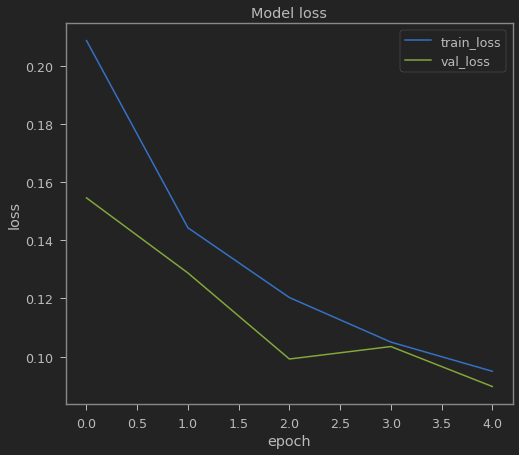

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

MINI CHALLENGE #6: 
- Add a dense layer with 250 neurons
- Print out the model summary and list the number of trainable parameters


# TASK #9: COMPARE MODELS AND CALCULATE REGRESSION KPIs 


In [ ]:
# From the above results, it can be seen that, decision tree model out-performs the other models.

Text(0, 0.5, 'True Values')

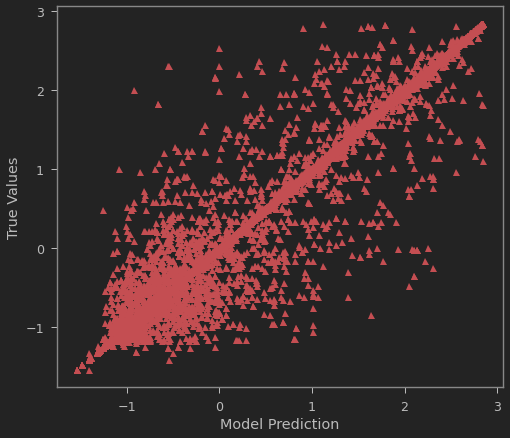

In [ ]:
y_predict=DecisionTree_model.predict(X_test)
plt.plot(y_predict,y_test,'^',color='r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

Text(0, 0.5, 'True Values')

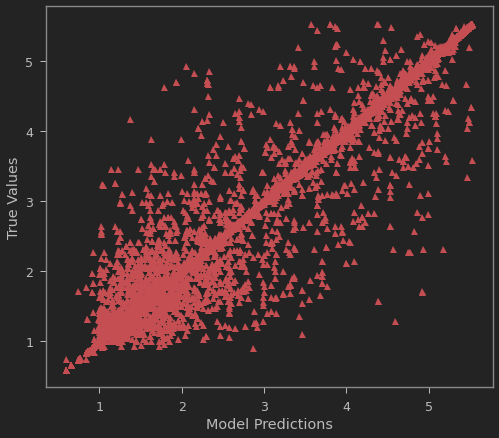

In [ ]:
y_predict_orig = Scaler_y.inverse_transform(y_predict)
y_test_orig = Scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.159 
MSE = 0.025422961718158082 
MAE = 0.025960022970934183 
R2 = 0.9799238149926219 
Adjusted R2 = 0.9799148226667437


# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1:

- Mineral Explorations 
- Autonomous Drillers 
- Minerals sorting

https://www.forbes.com/sites/bernardmarr/2018/09/07/the-4th-industrial-revolution-how-mining-companies-are-using-ai-machine-learning-and-robots/#fcde6c6497e5

MINI CHALLENGE #2: 
- What is the average percentage Silica concentrate?
- What is the maximum percentage Iron Concentrate?

In [ ]:
# Statistic summary of the dataframe
mining_df.describe()
# Average % Silica concentrate = 2.32%
# Maximum % Iron Concentrate = 68%

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000,245700.000000
mean,56.294974,14.651438,2869.241181,488.144186,397.577332,9.767534,1.680348,280.166032,277.172893,281.097236,299.449878,299.914710,292.091324,290.774336,520.242050,522.648563,531.355055,420.306805,425.237994,429.927646,421.006767,65.049435,2.327228
std,5.158958,6.808961,1187.990184,90.736360,9.468496,0.387036,0.069213,29.616570,29.936823,28.537193,2.494772,3.528870,29.880553,28.158596,130.389539,127.450562,150.614529,90.566437,83.601851,85.320602,83.736727,1.118479,1.125623
min,42.740000,1.310000,0.074147,241.699632,376.272600,8.753370,1.519829,175.666333,175.923177,176.471917,292.727820,286.713174,192.261000,186.074077,149.451600,211.266111,126.352031,162.293185,167.139620,161.485667,175.908240,62.050000,0.600000
25%,52.670000,8.940000,2073.322500,432.204667,395.212583,9.527157,1.647197,250.268667,250.367333,250.693667,298.733333,298.441667,265.997568,263.524333,413.516320,442.291000,410.134583,356.440167,357.074583,358.078583,356.567833,64.370000,1.440000
50%,56.080000,13.850000,2994.311667,504.510667,399.354833,9.797963,1.697560,299.418000,297.433000,299.048333,299.812667,299.907667,299.621667,299.350833,492.971167,496.380667,494.859500,410.511667,408.022833,419.931167,410.043333,65.210000,2.000000
75%,59.720000,19.600000,3712.951667,553.479083,402.458750,10.037833,1.728257,300.127333,300.435000,300.308667,300.413000,301.353333,301.381000,301.239667,594.960083,595.989167,601.060000,486.533417,485.580833,490.725500,475.922283,65.860000,3.010000
max,65.780000,33.400000,6295.130657,739.422405,418.625439,10.808046,1.853229,372.387588,369.550000,359.948635,305.853500,309.944913,368.052586,370.190800,862.197932,828.593000,886.820204,680.019967,675.571459,698.621871,659.618696,68.010000,5.530000


MINI CHALLENGE #3: 
- Plot the scatterplot between % Silica Concentrate and Iron Concentrate and try to relate to the correlation matrix. 
- Plot the scatterplot between % Iron Feed and % Silica Feed and try to relate to the correlation matrix. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


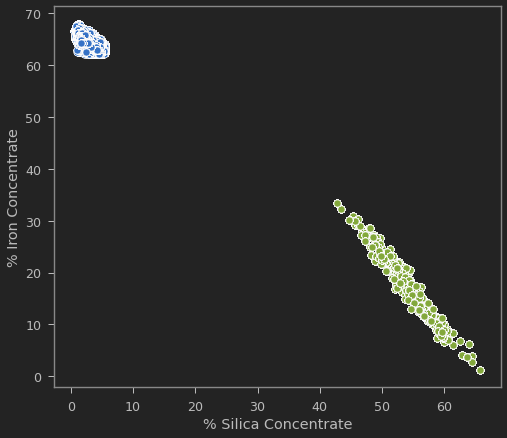

In [ ]:
sns.scatterplot(mining_df['% Silica Concentrate'], mining_df['% Iron Concentrate'])
sns.scatterplot(mining_df['% Iron Feed'], mining_df['% Silica Feed'])

MINI CHALLENGE #4: 
- Verify that the split was successful 

In [ ]:
X_test.shape

(49140, 22)

In [ ]:
X_train.shape

(196560, 22)

MINI CHALLENGE #5:
- Train a Random Forest Regressor Model with n_estimators = 100 and max_depth of 10 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomForest_model.fit(X_train, y_train)

accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8898469369642835

MINI CHALLENGE #6: 
- Add a dense layer with 250 neurons
- Print out the model summary and list the number of trainable parameters


In [ ]:
ANN_model.add(Dense(250, activation = 'relu'))
ANN_model.add(Dropout(0.1))